<a href="https://colab.research.google.com/github/ogbemi-ejegi/Overfitting/blob/main/home_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Import Libraries




In [ ]:
!pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

%matplotlib inline


## Import Datasets

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

## EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Data Analysis


Overview of the data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Check for Null Values



In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test.duplicated().sum()

0

Distribution of Loan Status


Yes: 0.6872964169381107
No: 0.3127035830618892


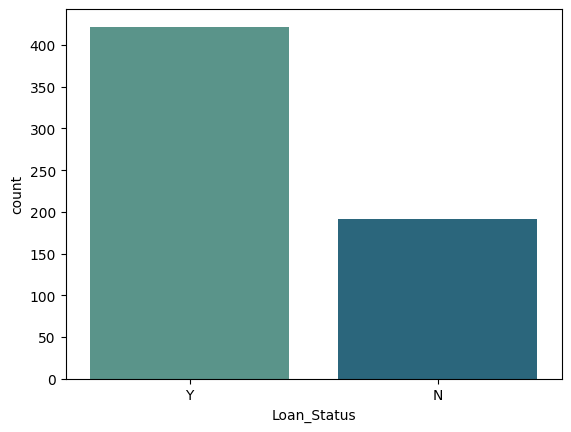

In [ ]:
print("Yes:", train['Loan_Status'].value_counts()[0]/len(train))

print("No:", train['Loan_Status'].value_counts()[1]/len(train))

sns.countplot(x="Loan_Status", data=train, palette="crest")
plt.show()


In [ ]:
#Combine both training and test data
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#View dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


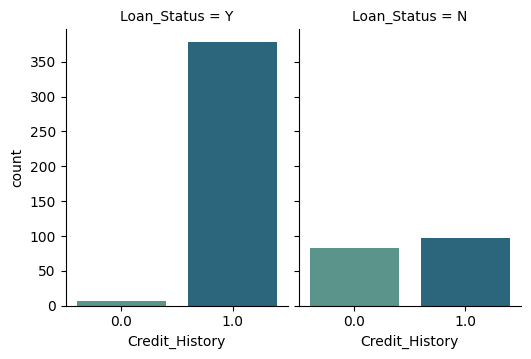

In [ ]:
grid = sns.FacetGrid(train, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History', palette="crest");
grid.fig.set_figwidth(5)
grid.fig.set_figheight(4)

### Data Preparation

In [ ]:
# Matrix of features

df_ = train[['Gender',
'Married',
'Education',
'Self_Employed',
'Dependents',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Property_Area',
'Credit_History']]
df_.head()

### Convert columns to categorical variable
df_['Gender'] = df_['Gender'].astype('category')
df_['Married'] = df_['Married'].astype('category')
df_['Education'] = df_['Education'].astype('category')
df_['Dependents'] = df_['Dependents'].astype('category')
df_['Self_Employed'] = df_['Self_Employed'].astype('category')
df_['Property_Area'] = df_['Property_Area'].astype('category')

### Handle Missing Values Here ###
df_['Gender'].fillna(df_['Gender'].mode()[0], inplace = True)
df_['Married'].fillna(df_['Married'].mode()[0], inplace = True)
df_['Self_Employed'].fillna(df_['Self_Employed'].mode()[0], inplace = True)
df_['Credit_History'].fillna(df_['Credit_History'].mode()[0], inplace = True)


### Include Numerical Features Here ###
df_['LoanAmount'].fillna(df_['LoanAmount'].mean(), inplace = True)
df_['Loan_Amount_Term'].fillna(df_['Loan_Amount_Term'].mean(), inplace = True)
df_['Dependents']=df_['Dependents'].fillna(df_['Dependents'].mode()[0])

df_.replace({"Married": {'No': 0, 'Yes': 1}, 'Gender': {'Male':1, 'Female': 0}, 'Self_Employed': {'No':0, 'Yes': 1}
                      , 'Property_Area': {'Rural':0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate':1, 'Not Graduate': 0}},
                     inplace = True)

#Replace all 3+ in the dependents column to 4 since 3+ wont be good for ML
df_ = df_.replace(to_replace ='3+', value = 4)


In [ ]:
### Check for missing values
df_.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Credit_History       0
dtype: int64

In [ ]:
### Duplicate a copy of df into X
X = df_.copy()

In [ ]:
### label encode for Y
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

In [ ]:
### train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train
clf = DecisionTreeClassifier(max_depth=40) #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)
print(X_train)

    Gender Married Education Self_Employed Dependents  ApplicantIncome  \
83       1       1         1             0          0             6000   
90       1       1         1             0          0             2958   
227      1       1         1             0          2             6250   
482      1       1         1             0          0             2083   
464      1       0         1             0          0             4166   
..     ...     ...       ...           ...        ...              ...   
71       1       1         0             1          2             1875   
106      1       1         1             0          2            11417   
270      0       0         1             0          0             3237   
435      0       1         1             0          0            10047   
102      1       1         1             0          0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term Property_Area  \
83              2250.0  265.000000       

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7073170731707317


In [ ]:
print(confusion_matrix(predictions_clf, y_test))

[[23 16]
 [20 64]]


In [ ]:
train_accuracies = []
test_accuracies = []

In [ ]:
for depth in range(1, 25):
  tree_model = DecisionTreeClassifier(max_depth = depth)
  tree_model.fit(X_train, y_train)

  train_predictions = tree_model.predict(X_train)
  test_predictions = tree_model.predict(X_test)

  #calculate training and test accuracy
  train_accuracy = metrics.accuracy_score(y_train, train_predictions)

  test_accuracy = metrics.accuracy_score(y_test, test_predictions)

  #Append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

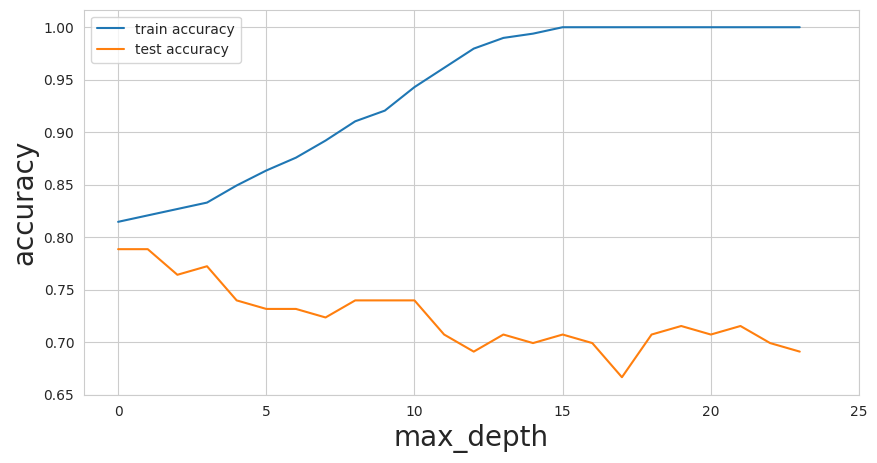

In [ ]:
#Creating our plot
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label= "train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc = "upper left")
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()